## Выполнение задач практической работы

In [3]:
%pip install psycopg2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ---------------------

In [1]:
%pip install psycopg2-binary pandas sqlalchemy matplotlib numpy

  Obtaining dependency information for psycopg2-binary from https://files.pythonhosted.org/packages/92/29/06261ea000e2dc1e22907dbbc483a1093665509ea586b29b8986a0e56733/psycopg2_binary-2.9.10-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for sqlalchemy from https://files.pythonhosted.org/packages/2a/9f/14c511cda174aa1ad9b0e42b64ff5a71db35d08b0d80dc044dae958921e5/sqlalchemy-2.0.40-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a6/b6/a9405484fb40746fdc6ae4502b16a9d6e53282ba5baaf9ebe2da579f68c4/matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/8b/09/4ffb4d6cfe7ca6707336187951992bd8a8b9142cf34

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import psycopg2
from psycopg2 import Error
from psycopg2 import extras # For execute_values
import pandas as pd
from sqlalchemy import create_engine
import io # For StringIO
import time
import matplotlib.pyplot as plt
import numpy as np
import os # To check file existence

In [10]:
big_csv_path:r'"C:\Users\damdi\Desktop\уник\Практикум sql\8пр\upload_test_data_big.csv"'

In [5]:
small_csv_path:r'"C:\Users\damdi\Desktop\уник\Практикум sql\8пр\upload_test_data.csv"'

In [11]:
%ls

 ��� � ���ன�⢥ C ����� ���� Windows
 ��਩�� ����� ⮬�: E284-7F13

 ����ন��� ����� c:\Users\damdi\Desktop\㭨�\�ࠪ⨪� sql\8��

26.04.2025  13:55    <DIR>          .
27.04.2025  16:07    <DIR>          ..
26.04.2025  13:55           133�072 lecture8_student.ipynb
               1 䠩���        133�072 ����
               2 �����  28�462�702�592 ���� ᢮�����


In [19]:

# @markdown Установка и импорт необходимых библиотек.


print("Libraries installed and imported successfully.")

# Database connection details (replace with your actual credentials if different)
DB_USER = "postgres"
DB_PASSWORD = "1"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "lect_08_bda_big_data"

# CSV File Paths (Ensure these files are uploaded to your Colab environment)
small_csv_path = 'upload_test_data.csv'
big_csv_path = 'upload_test_data_big.csv' # Corrected filename

# Table name in PostgreSQL
table_name = 'sales_data'

Libraries installed and imported successfully.


In [18]:
# @title # 3. Database Connection Test
# @markdown Проверка соединения с базой данных PostgreSQL.

connection = None
cursor = None
engine = None # For pandas.to_sql

try:
    # Establish connection using psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user=DB_USER,
                                  password=DB_PASSWORD,
                                  host=DB_HOST,
                                  port=DB_PORT,
                                  database=DB_NAME)
    connection.autocommit = False # Important for COPY and batch inserts within transactions
    cursor = connection.cursor()

    print("PostgreSQL server information:")
    print(connection.get_dsn_parameters(), "\n")
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print(f"Successfully connected to: {record[0]}\n")

    # Create SQLAlchemy engine for pandas
    print("Creating SQLAlchemy engine...")
    engine_url = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
    engine = create_engine(engine_url)
    print("SQLAlchemy engine created successfully.")


except (Exception, Error) as error:
    print(f"Error while connecting to PostgreSQL: {error}")
    # Ensure resources are closed even if connection fails partially
    if cursor:
        cursor.close()
    if connection:
        connection.close()
    if engine:
        engine.dispose() # Close SQLAlchemy engine pool
    connection, cursor, engine = None, None, None # Reset variables

# We keep the connection open for the rest of the script.
# It will be closed in the final step.

Connecting to PostgreSQL database using psycopg2...
PostgreSQL server information:
{'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'lect_08_bda_big_data', 'host': 'localhost', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'} 

Successfully connected to: PostgreSQL 16.8, compiled by Visual C++ build 1942, 64-bit

Creating SQLAlchemy engine...
SQLAlchemy engine created successfully.


In [20]:
# @title # 4. Data Source Analysis and ER Diagram Sketch
# @markdown Анализ структуры CSV файлов и создание эскиза ER-диаграммы.

# @markdown ---
# @markdown ## 4.1. Анализ структуры данных

# @markdown Загрузим небольшой фрагмент данных из каждого файла, чтобы увидеть структуру.

if connection: # Proceed only if connection is established
    try:
        print(f"--- Analyzing {small_csv_path} ---")
        if os.path.exists(small_csv_path):
            df_small_sample = pd.read_csv(small_csv_path, nrows=5)
            print("First 5 rows:")
            print(df_small_sample)
            print("\nData Types (inferred by Pandas):")
            print(df_small_sample.info())
        else:
            print(f"ERROR: File not found: {small_csv_path}. Please upload it.")

        print(f"\n--- Analyzing {big_csv_path} ---")
        if os.path.exists(big_csv_path):
            df_big_sample = pd.read_csv(big_csv_path, nrows=5)
            print("First 5 rows:")
            print(df_big_sample)
            print("\nData Types (inferred by Pandas):")
            print(df_big_sample.info())
        else:
             print(f"ERROR: File not found: {big_csv_path}. Please upload it.")

    except Exception as e:
        print(f"An error occurred during file analysis: {e}")
else:
    print("Database connection not established. Skipping data analysis.")


# @markdown ---
# @markdown ## 4.2. Эскиз ER-диаграммы (для обоих источников)

# @markdown Поскольку оба CSV файла содержат одинаковые колонки (`id`, `quantity`, `cost`, `total_revenue`), структура базы данных будет идентичной для обоих источников. Она будет состоять из одной таблицы.

# @markdown **Таблица: `sales_data`**
# @markdown *   `id` : INTEGER (Primary Key) - Уникальный идентификатор записи.
# @markdown *   `quantity` : INTEGER - Количество проданных единиц товара.
# @markdown *   `cost` : NUMERIC(10, 2) - Стоимость одной единицы товара. (Используем NUMERIC для точности).
# @markdown *   `total_revenue` : NUMERIC(12, 2) - Общая выручка (quantity * cost). (Используем NUMERIC для точности).

# @markdown **Визуальное представление (текстовое):**
# @markdown ```
# @markdown +-----------------+
# @markdown |   sales_data    |
# @markdown +-----------------+
# @markdown | PK id INTEGER     |
# @markdown |    quantity INTEGER |
# @markdown |    cost NUMERIC(10,2) |
# @markdown |    total_revenue NUMERIC(12,2) |
# @markdown +-----------------+
# @markdown ```
# @markdown *Примечание: Связи отсутствуют, так как у нас только одна таблица в данной задаче.*

--- Analyzing upload_test_data.csv ---
ERROR: File not found: upload_test_data.csv. Please upload it.

--- Analyzing upload_test_data_big.csv ---
ERROR: File not found: upload_test_data_big.csv. Please upload it.


In [22]:
# @title # 5. Database Table Preparation
# @markdown Создание таблицы в PostgreSQL перед загрузкой данных.

if connection and cursor:
    try:
        # Drop the table if it exists (for repeatable testing)
        print(f"Dropping table '{table_name}' if it exists...")
        cursor.execute(f"DROP TABLE IF EXISTS {table_name};")
        connection.commit() # Commit the drop
        print(f"Table '{table_name}' dropped successfully or did not exist.")

        # Create the table with the defined schema
        create_table_query = f"""
        CREATE TABLE {table_name} (
            id INTEGER PRIMARY KEY,
            quantity INTEGER,
            cost NUMERIC(10, 2),
            total_revenue NUMERIC(12, 2)
        );
        """
        print(f"Creating table '{table_name}'...")
        cursor.execute(create_table_query)
        connection.commit() # Commit the creation
        print(f"Table '{table_name}' created successfully.")

    except (Exception, Error) as error:
        print(f"Error during table preparation: {error}")
        connection.rollback() # Rollback changes if error occurs

else:
    print("Database connection not established. Skipping table preparation.")

# Helper function to reset table data between tests
def reset_table(conn, cur, tbl_name):
    """Truncates the specified table."""
    try:
        cur.execute(f"TRUNCATE TABLE {tbl_name};")
        conn.commit()
        # print(f"Table '{tbl_name}' truncated.")
    except (Exception, Error) as error:
        print(f"Error truncating table {tbl_name}: {error}")
        conn.rollback()

Dropping table 'sales_data' if it exists...
Table 'sales_data' dropped successfully or did not exist.
Creating table 'sales_data'...
Table 'sales_data' created successfully.


In [23]:
# @title # 6. Data Loading Methods Implementation and Timing
# @markdown Реализация и измерение времени для каждого метода загрузки.

# Dictionary to store timing results
timing_results = {
    'small_file': {},
    'big_file': {}
}

# Check if files exist before proceeding
if not os.path.exists(small_csv_path):
    print(f"ERROR: Small CSV file not found: {small_csv_path}. Upload it and restart.")
elif not os.path.exists(big_csv_path):
    print(f"ERROR: Big CSV file not found: {big_csv_path}. Upload it and restart.")
elif not connection or not cursor or not engine:
    print("ERROR: Database connection not ready. Cannot proceed.")
else:
    # --- Method 1: pandas.to_sql() ---
    def load_with_pandas_to_sql(eng, df, tbl_name, chunk_size=1000):
        """Loads data using pandas.to_sql() and returns time taken."""
        start_time = time.perf_counter()
        try:
            # Using method='multi' might be faster for some DBs/data
            # Chunksize helps manage memory for large files
            df.to_sql(tbl_name, eng, if_exists='append', index=False, method='multi', chunksize=chunk_size)
        except Exception as e:
             print(f"Error in pandas.to_sql: {e}")
             # Note: No explicit transaction management here, relies on SQLAlchemy/DBAPI defaults or engine settings.
             # For critical data, wrap in a try/except with explicit rollback if needed.
             raise # Re-raise the exception to signal failure
        end_time = time.perf_counter()
        return end_time - start_time

    # --- Method 2: psycopg2.copy_expert() with CSV file ---
    def load_with_copy_expert_file(conn, cur, tbl_name, file_path):
        """Loads data using psycopg2.copy_expert() directly from file and returns time taken."""
        start_time = time.perf_counter()
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                # Skip header row using COPY options
                sql_copy = f"""
                COPY {tbl_name} FROM STDIN WITH (FORMAT CSV, HEADER TRUE, DELIMITER ',')
                """
                cur.copy_expert(sql=sql_copy, file=f)
            conn.commit() # Commit transaction after successful COPY
        except (Exception, Error) as error:
            print(f"Error in copy_expert (file): {error}")
            conn.rollback() # Rollback on error
            raise
        end_time = time.perf_counter()
        return end_time - start_time

    # --- Method 3: psycopg2.copy_expert() with io.StringIO ---
    def load_with_copy_expert_stringio(conn, cur, df, tbl_name):
        """Loads data using psycopg2.copy_expert() from an in-memory StringIO buffer and returns time taken."""
        start_time = time.perf_counter()
        buffer = io.StringIO()
        # Write dataframe to buffer as CSV, including header
        df.to_csv(buffer, index=False, header=True, sep=',')
        buffer.seek(0) # Rewind buffer to the beginning
        try:
            sql_copy = f"""
            COPY {tbl_name} FROM STDIN WITH (FORMAT CSV, HEADER TRUE, DELIMITER ',')
            """
            cur.copy_expert(sql=sql_copy, file=buffer)
            conn.commit() # Commit transaction after successful COPY
        except (Exception, Error) as error:
            print(f"Error in copy_expert (StringIO): {error}")
            conn.rollback() # Rollback on error
            raise
        finally:
            buffer.close() # Ensure buffer is closed
        end_time = time.perf_counter()
        return end_time - start_time


    # --- Timing Execution ---
    print("\n--- Starting Data Loading Tests ---")

    # Load DataFrames (only once)
    print("Loading CSV files into Pandas DataFrames...")
    try:
        df_small = pd.read_csv(small_csv_path)
        # The big file might be too large to load fully into Colab memory.
        # If memory errors occur, consider processing it in chunks for methods
        # that support it (like pandas.to_sql with chunksize, or modify batch insert).
        # For COPY methods, memory isn't usually an issue as they stream.
        df_big = pd.read_csv(big_csv_path)
        print(f"Loaded {len(df_small)} rows from {small_csv_path}")
        print(f"Loaded {len(df_big)} rows from {big_csv_path}")
    except MemoryError:
        print("\nERROR: Not enough RAM to load the large CSV file into a Pandas DataFrame.")
        print("Some methods (pandas.to_sql, StringIO, Batch Insert) might fail or be inaccurate.")
        print("The copy_expert (file) method should still work.")
        # We can try to proceed, but note the limitation
        df_big = None # Indicate that the big dataframe couldn't be loaded
    except Exception as e:
        print(f"Error loading CSVs into DataFrames: {e}")
        df_small, df_big = None, None # Stop execution if loading fails


    if df_small is not None: # Proceed only if small DF loaded
        # --- Small File Tests ---
        print(f"\n--- Testing with Small File ({small_csv_path}) ---")

        # Test pandas.to_sql
        try:
            reset_table(connection, cursor, table_name)
            print("Running pandas.to_sql...")
            t = load_with_pandas_to_sql(engine, df_small, table_name)
            timing_results['small_file']['pandas.to_sql'] = t
            print(f"Finished in {t:.4f} seconds.")
        except Exception as e: print(f"pandas.to_sql failed for small file.")

        # Test copy_expert (file)
        try:
            reset_table(connection, cursor, table_name)
            print("Running copy_expert (file)...")
            t = load_with_copy_expert_file(connection, cursor, table_name, small_csv_path)
            timing_results['small_file']['copy_expert (file)'] = t
            print(f"Finished in {t:.4f} seconds.")
        except Exception as e: print(f"copy_expert (file) failed for small file.")

        # Test copy_expert (StringIO)
        try:
            reset_table(connection, cursor, table_name)
            print("Running copy_expert (StringIO)...")
            t = load_with_copy_expert_stringio(connection, cursor, df_small, table_name)
            timing_results['small_file']['copy_expert (StringIO)'] = t
            print(f"Finished in {t:.4f} seconds.")
        except Exception as e: print(f"copy_expert (StringIO) failed for small file.")



    # --- Big File Tests ---
    print(f"\n--- Testing with Big File ({big_csv_path}) ---")

    # Test pandas.to_sql (if df_big loaded)
    if df_big is not None:
        try:
            reset_table(connection, cursor, table_name)
            print("Running pandas.to_sql...")
            t = load_with_pandas_to_sql(engine, df_big, table_name, chunk_size=10000) # Larger chunksize for big file
            timing_results['big_file']['pandas.to_sql'] = t
            print(f"Finished in {t:.4f} seconds.")
        except Exception as e: print(f"pandas.to_sql failed for big file.")
    else:
        print("Skipping pandas.to_sql for big file (DataFrame not loaded).")


    # Test copy_expert (file) - This should work even if df_big didn't load
    try:
        reset_table(connection, cursor, table_name)
        print("Running copy_expert (file)...")
        t = load_with_copy_expert_file(connection, cursor, table_name, big_csv_path)
        timing_results['big_file']['copy_expert (file)'] = t
        print(f"Finished in {t:.4f} seconds.")
    except Exception as e: print(f"copy_expert (file) failed for big file.")


    # Test copy_expert (StringIO) (if df_big loaded)
    if df_big is not None:
        try:
            reset_table(connection, cursor, table_name)
            print("Running copy_expert (StringIO)...")
            t = load_with_copy_expert_stringio(connection, cursor, df_big, table_name)
            timing_results['big_file']['copy_expert (StringIO)'] = t
            print(f"Finished in {t:.4f} seconds.")
        except Exception as e: print(f"copy_expert (StringIO) failed for big file.")
    else:
        print("Skipping copy_expert (StringIO) for big file (DataFrame not loaded).")



    print("\n--- Data Loading Tests Finished ---")

# Final check of results dictionary
print("\nTiming Results Summary:")
import json
print(json.dumps(timing_results, indent=2))


--- Starting Data Loading Tests ---
Loading CSV files into Pandas DataFrames...
Loaded 1000 rows from upload_test_data.csv
Loaded 1000000 rows from upload_test_data_big.csv

--- Testing with Small File (upload_test_data.csv) ---
Running pandas.to_sql...
Finished in 0.2728 seconds.
Running copy_expert (file)...
Finished in 0.0140 seconds.
Running copy_expert (StringIO)...
Finished in 0.0156 seconds.

--- Testing with Big File (upload_test_data_big.csv) ---
Running pandas.to_sql...
Finished in 132.8691 seconds.
Running copy_expert (file)...
Finished in 6.2261 seconds.
Running copy_expert (StringIO)...
Finished in 9.6002 seconds.

--- Data Loading Tests Finished ---

Timing Results Summary:
{
  "small_file": {
    "pandas.to_sql": 0.27281760000005306,
    "copy_expert (file)": 0.013990000000376313,
    "copy_expert (StringIO)": 0.015616300000147021
  },
  "big_file": {
    "pandas.to_sql": 132.86914959999922,
    "copy_expert (file)": 6.226085899999816,
    "copy_expert (StringIO)": 9.60


Note: Using logarithmic scale for Y-axis due to large time differences.


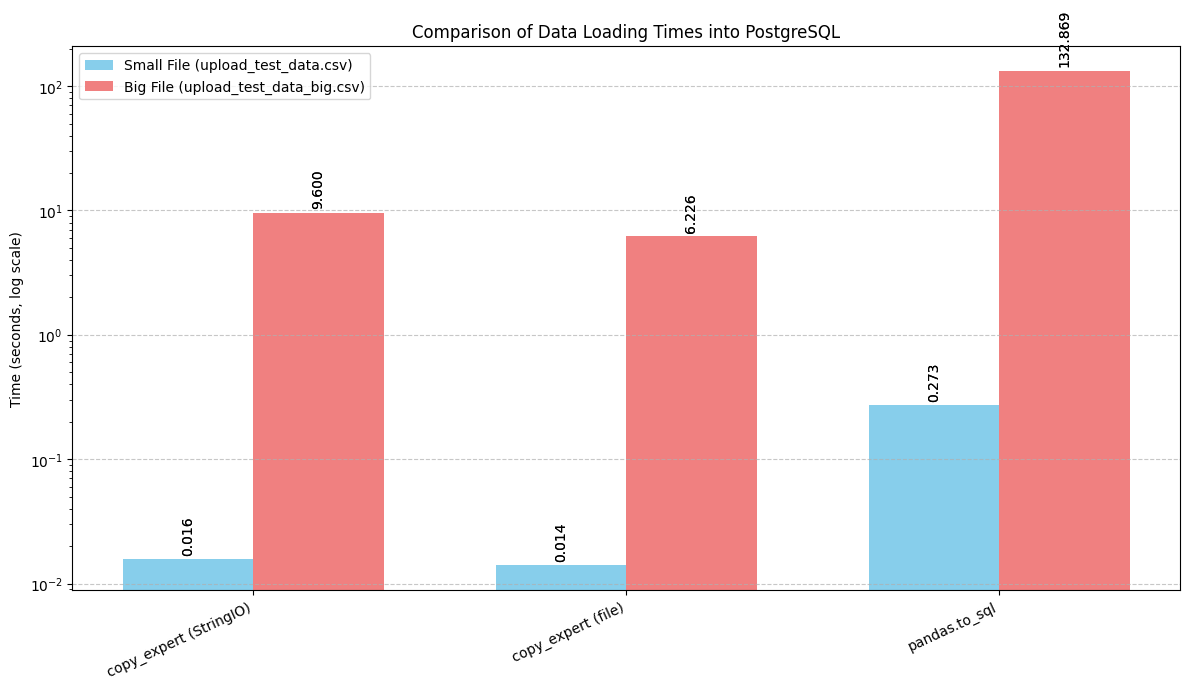

In [24]:
# @title # 7. Results Visualization
# @markdown Визуализация результатов сравнения времени загрузки.

if not timing_results['small_file'] and not timing_results['big_file']:
    print("No timing results available to plot.")
else:
    # Prepare data for plotting
    methods = list(set(timing_results['small_file'].keys()) | set(timing_results['big_file'].keys()))
    methods.sort() # Ensure consistent order

    small_times = [timing_results['small_file'].get(method, 0) for method in methods] # Use .get with default 0 if method failed
    big_times = [timing_results['big_file'].get(method, 0) for method in methods]

    x = np.arange(len(methods))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7)) # Increase figure size for better readability

    rects1 = ax.bar(x - width/2, small_times, width, label=f'Small File ({os.path.basename(small_csv_path)})', color='skyblue')
    rects2 = ax.bar(x + width/2, big_times, width, label=f'Big File ({os.path.basename(big_csv_path)})', color='lightcoral')

    # Add some text for labels, title and axes ticks
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Comparison of Data Loading Times into PostgreSQL')
    ax.set_xticks(x)
    # Rotate labels for better fit if names are long
    ax.set_xticklabels(methods, rotation=25, ha="right")
    ax.legend()

    # Add labels on top of bars
    ax.bar_label(rects1, padding=3, fmt='%.3f', rotation=90)
    ax.bar_label(rects2, padding=3, fmt='%.3f', rotation=90)

    # Use a logarithmic scale for the y-axis if the differences are very large
    # This helps visualize smaller values when large values dominate.
    # Check if the max time is significantly larger than the min non-zero time
    all_times = [t for t in small_times + big_times if t > 0]
    if all_times and (max(all_times) / min(all_times) > 50): # Threshold for using log scale
        ax.set_yscale('log')
        ax.set_ylabel('Time (seconds, log scale)')
        # Adjust label formatting for log scale if needed, though default might be fine
        ax.bar_label(rects1, padding=3, fmt='%.3f', rotation=90)
        ax.bar_label(rects2, padding=3, fmt='%.3f', rotation=90)
        print("\nNote: Using logarithmic scale for Y-axis due to large time differences.")


    fig.tight_layout() # Adjust layout to prevent labels overlapping
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
    plt.show()